In [1]:
import numpy as np
import pandas as pd

In [2]:
# csv 파일 로드 / df = pd.read_csv('파일저장위치', encoding = 'euc-kr') / 헬스케어 데이터 csv파일 3개 종합본파일입니다.
df = pd.read_csv('C:\\Workspace\\python\\빅데이터 지능형서비스 개발 팀프로젝트(21.9.27~10.6)\\Project-1\\조정범\\Data\\헬스케어데이터.csv')

In [3]:
df.head()

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자
0,2019,1,104243474,2,12,46,20191104,3,5,M751,M750,1,1,0.25,19240,9600,9640,0,20201222
1,2019,1,107479370,2,12,46,20190806,3,1,E1164,N308,1,1,0.25,145680,72800,72880,0,20201222
2,2019,1,106881883,2,12,46,20190920,3,1,N308,E1164,1,1,0.25,13240,6600,6640,3,20201222
3,2019,1,109043837,2,12,46,20190807,2,1,E1164,N308,7,21,0.25,861590,205810,655780,0,20201222
4,2019,1,103174392,2,12,46,20190318,3,13,H6531,J303,1,1,0.15,48440,14500,33940,3,20201222


In [4]:
# 주상병코드 간소화 열 추가
df['주상병코드(대분류)'] = df['주상병코드'].apply(lambda x: x[:1])
df['주상병코드(중분류)'] = df['주상병코드'].apply(lambda x: x[:3] if len(x) >= 3 else x[:1])
df
# for i in range(len(df['주상병코드(수정)'])):
#     if len(df['주상병코드(수정)'][i]) < 3:
#         print(df['주상병코드(수정)'][i], i)

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,...,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자,주상병코드(대분류),주상병코드(중분류)
0,2019,1,104243474,2,12,46,20191104,3,5,M751,...,1,1,0.25,19240,9600,9640,0,20201222,M,M75
1,2019,1,107479370,2,12,46,20190806,3,1,E1164,...,1,1,0.25,145680,72800,72880,0,20201222,E,E11
2,2019,1,106881883,2,12,46,20190920,3,1,N308,...,1,1,0.25,13240,6600,6640,3,20201222,N,N30
3,2019,1,109043837,2,12,46,20190807,2,1,E1164,...,7,21,0.25,861590,205810,655780,0,20201222,E,E11
4,2019,1,103174392,2,12,46,20190318,3,13,H6531,...,1,1,0.15,48440,14500,33940,3,20201222,H,H65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13178340,2019,1000000,104797603,2,1,47,20191002,3,21,P220,...,1,1,0.30,71000,7100,63900,0,20201222,P,P22
13178341,2019,1000000,103516276,2,1,47,20191224,3,11,J209,...,1,1,0.20,17620,1700,15920,3,20201222,J,J20
13178342,2019,1000000,110172739,2,1,47,20190626,3,12,H351,...,1,1,0.25,31890,3100,28790,0,20201222,H,H35
13178343,2019,1000000,110819612,2,1,47,20190612,2,11,P220,...,11,12,0.25,1757040,27670,1729370,0,20201222,P,P22


In [5]:
# 활용할 코드 테이블 로드
sido_table = pd.read_csv('C:\\Workspace\\python\\빅데이터 지능형서비스 개발 팀프로젝트(21.9.27~10.6)\\Project-1\\조정범\\Data\\시도코드테이블.csv')

In [6]:
# 상병마스터 코드 활용을 위한 전처리(1)
from tqdm.notebook import tqdm
ds_master = pd.read_csv('C:\\Workspace\\python\\빅데이터 지능형서비스 개발 팀프로젝트(21.9.27~10.6)\\Project-1\\조정범\\Data\\건강보험심사평가원_상병마스터_20200701.csv', encoding = 'cp949')
ds_master_train = ds_master.iloc[:, : 3] # 필요데이터 슬라이싱
ds_master_train.dropna(inplace = True) # nan값 제거
ds_master_train['분류기준'] = ['-' for _ in range(len(ds_master_train['상병기호']))]
for i in tqdm(range(len(ds_master_train['상병기호']))):
    ds_master_train['분류기준'][i] = ds_master_train['상병기호'][i] if len(ds_master_train['상병기호'][i]) <= 3 else '-'


  0%|          | 0/48194 [00:00<?, ?it/s]

In [7]:
# 상병마스터 코드 활용을 위한 전처리(2)
ds_master_train2 = ds_master_train[ds_master_train['분류기준'] != '-']
ds_master_train2.reset_index(inplace = True)
ds_master_train2.drop(['index', '분류기준'], axis = 1, inplace = True)
ds_master_train2

C:\Users\Bestc\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,상병기호,한글명,영문명
0,A00,콜레라,Cholera
1,A01,장티푸스 및 파라티푸스,Typhoid and paratyphoid fevers
2,A02,기타 살모넬라감염,Other salmonella infections
3,A02,살모넬라 티피와 살모넬라 파라티피 이외의 살모넬라종에 의하여 생긴 감염 또는 식중독,Infection or foodborne intoxication due to any...
4,A03,시겔라증,Shigellosis
...,...,...,...
3706,Z95,심장 및 혈관 삽입물 및 이식편의 존재,Presence of cardiac and vascular implants and ...
3707,Z96,기타 기능성 삽입물의 존재,Presence of other functional implants
3708,Z97,기타 장치의 존재,Presence of other devices
3709,Z98,기타 수술후 상태,Other postsurgical states


In [8]:
# 진료과목 코드 활용을 위한 전처리(1) / 파일출처 : 보건의료빅데이터개방시스템 (https://opendata.hira.or.kr/op/opc/selectColumnCodeList.do?pageIndex=8)
df_dsbjt= pd.read_excel('C:\\Workspace\\python\\빅데이터 지능형서비스 개발 팀프로젝트(21.9.27~10.6)\\Project-1\\조정범\\Data\\컬럼정보_코드.xls')
df_dsbjt_train = df_dsbjt[df_dsbjt['코드구분'] == '진료과목코드'].drop(['코드구분', '설명'], axis = 1)
df_dsbjt_train['코드'] = df_dsbjt_train['코드'].apply(lambda x: int(x))  

In [9]:
# 함수에 사용할 딕셔너리
# 만들어야하는 딕셔너리들 : 성별(완료), 연령대(완료), 시도(완료), 서식(완료), 진료과목(완료), 상병코드

# 성별 딕셔너리
sex_dict = dict(zip([1, 2], ['남성', '여성'])) 

# 연령대 코드 딕셔너리
age_code_list = ['00~04', '05~09', '10~14', '15~19', '20~24', '25~29', '30~34', '35~39', '40~44', '45~49', '50~54', '55~59', '60~64', 
                 '65~69', '70~74', '75~79', '80~84', '85~89']
age_dict = dict(zip([i for i in range(1, 19)], age_code_list))

# 시도코드 딕셔너리 - 사용할 geojson파일과 명칭 일치화 완료
sido_dict = dict(zip(sido_table['시도코드'], sido_table['시도명']))

# 서식코드 딕셔너라
form_code_list = ['청구서', '의과입원', '의과외래', '치과입원', '치과외래', '조산원입원', '보건기관입원', '보건기관외래',
                  '정신과 낮 병동', '정신과 입원', '정신과 외래', '한방입원', '한방외래', '직접조제', '처방조제', '조산원외래']
form_dict = dict(zip([_ for _ in range(1, len(form_code_list) - 3)] + [13, 20, 21, 99], form_code_list))

# 진료과목코드 딕셔너리
dsbjt_dict = dict(zip(df_dsbjt_train['코드'], df_dsbjt_train['명칭']))

# 상병코드 딕셔너리
eng_list = ['A','B','C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
ds_plus_list = ['특정 감염성 및 기생충성 질환', '특정 감염성 및 기생충성 질환', '신생물', '혈액 및 조혈기관의 질환',
                '내분비, 영양 및 대사질환', '정신 및 행동장애', '신경계통의 질환', '눈, 귀의 질환', '순환계통의 질환',
                '호흡계통의 질환', '소화계통의 질환', '피부과 질환', '근골격계통 질환', '비뇨생식계통 질환', '산부인과계통 질환',
                '출생전후기관련 질환', '선천기형, 변형 및 염색체이상', '미분류 질환', '손상, 중독 및 외인에 의한 질환',
                '손상, 중독 및 외인에 의한 질환', '특수목적 코드', '질병이환 및 사망의 외인', '질병이환 및 사망의 외인',
                '질병이환 및 사망의 외인', '질병이환 및 사망의 외인', '건강상태 및 보건서비스 접촉에 영향을 주는 요인']
ds_dict1 = dict(zip(eng_list, ds_plus_list))
ds_dict2 = dict(zip(ds_master_train2['상병기호'], ds_master_train2['한글명']))
ds_dict = {**ds_dict1, **ds_dict2}
print(ds_dict1)

# 전체 딕셔너리(1 : sex, 2: age, 3: sido, 4: form, 5.dsbjt(진료과목) 6.ds(상병코드) / 작성완료) 
al_list = [sex_dict, age_dict, sido_dict, form_dict, dsbjt_dict, ds_dict]
al_dict = dict(zip([x for x in range(1, len(al_list) + 1)], [i for i in al_list]))

{'A': '특정 감염성 및 기생충성 질환', 'B': '특정 감염성 및 기생충성 질환', 'C': '신생물', 'D': '혈액 및 조혈기관의 질환', 'E': '내분비, 영양 및 대사질환', 'F': '정신 및 행동장애', 'G': '신경계통의 질환', 'H': '눈, 귀의 질환', 'I': '순환계통의 질환', 'J': '호흡계통의 질환', 'K': '소화계통의 질환', 'L': '피부과 질환', 'M': '근골격계통 질환', 'N': '비뇨생식계통 질환', 'O': '산부인과계통 질환', 'P': '출생전후기관련 질환', 'Q': '선천기형, 변형 및 염색체이상', 'R': '미분류 질환', 'S': '손상, 중독 및 외인에 의한 질환', 'T': '손상, 중독 및 외인에 의한 질환', 'U': '특수목적 코드', 'V': '질병이환 및 사망의 외인', 'W': '질병이환 및 사망의 외인', 'X': '질병이환 및 사망의 외인', 'Y': '질병이환 및 사망의 외인', 'Z': '건강상태 및 보건서비스 접촉에 영향을 주는 요인'}


In [10]:
# df['성별코드'] = df['성별코드'].apply(lambda x: sex_dict[x])
# 함수를 사용하면 반드시 변수선언해주세요! 원본 데이터프레임에는 적용안됩니다!
# 상병코드는 슬라이싱 해서 데이터 프레임에 적용된 열로 적용해주셔야 원본데이터 손실 및 수정이 안되니 꼭 열을 새로만든후에 적용해주세요.
# 상병코드는 특이점 때문에 따로 함수 작성했습니다. 해당내용 참고해주세요.
# 한글로 바꾼 상병코드를 다시 코드로 반환하는 함수는 없으니 참고해주세요.

# 코드들을 한글로 변환하는 함수입니다.
def ch_to_kor(num, dataframe, df_columns_name):
    dataFrame = dataframe[:]
    apply_dict = al_dict[num] # 사용할 코드테이블 선언
    dataFrame[df_columns_name] = dataFrame[df_columns_name].apply(lambda x: apply_dict[x]) 
    return dataFrame

# 변환된 코드들을 다시 코드로 변환하는 함수입니다.
def ch_to_code(num, dataframe, df_columns_name):
    dataFrame = dataframe[:]
    apply_dict = al_dict[num] # 사용할 코드테이블 선언
    dict_rv = {v:k for k,v in apply_dict.items()} # 딕셔너리 반전
    dataFrame[df_columns_name] = dataFrame[df_columns_name].apply(lambda x: dict_rv[x]) 
    return dataFrame

# 코드들을 한글로 변환하는 함수입니다.(상병코드 - 중분류용 : 상병코드 길이가 3)
def ch_to_kor_ds1(num, dataframe, df_columns_name):
    dataFrame = dataframe[:]
    apply_dict = al_dict[num] # 사용할 코드테이블 선언
    for i in range(len(dataFrame[df_columns_name])):
        if len(dataFrame[df_columns_name]) == 3:
            try:
                dataFrame[df_columns_name][i] = apply_dict[dataFrame[df_columns_name][i]]
            except: 
                dataFrame[df_columns_name][i] = np.nan
        else:
            dataFrame[df_columns_name][i] = np.nan
    return dataFrame

# 코드들을 한글로 변환하는 함수입니다.(상병코드 - 대분류용 : 상병코드 길이가 1)
def ch_to_kor_ds2(num, dataframe, df_columns_name):
    dataFrame = dataframe[:]
    apply_dict = al_dict[num] # 사용할 코드테이블 선언
    dataFrame[df_columns_name] = dataFrame[df_columns_name].apply(lambda x: apply_dict[x] if len(x) == 1 else np.NaN) 
    return dataFrame

In [11]:
# 숫자 순서(1 : sex, 2: age, 3: sido, 4: form, 5.dsbjt(진료과목) 6.ds(상병코드) / 작성완료) 

# ch_to_kor / 작동확인완료 : 1, 2, 3, 4, 5
# ch_to_kor(5, df, '진료과목코드')

# ch_to_kor_ds1 / 작동확인중 / nan값이 많으니 사용하실 때 참고해주세요.
# ch_to_kor_ds1(6, df, '주상병코드(중분류)')

# ch_to_kor_ds2 / 작동확인완료 / nan값이 많으니 사용하실 때 참고해주세요.
# ch_to_kor_ds2(6, df, '주상병코드(대분류)')

In [12]:
# 사용할 데이터프레임 만들기
df_train = df[:] 
df_train['주상병코드'] = df_train['주상병코드(대분류)'] # 주상병코드 열 일치화
df_train.drop(['기준년도', '데이터 기준일자', '주상병코드(대분류)', '주상병코드(중분류)', '진료내역일련번호'], axis = 1, inplace = True) # 불필요한 열 삭제
df_train['부상병코드'] = df_train['부상병코드'].apply(lambda x: x[:1])

# 코드들을 한글로 변환
df_train = ch_to_kor(1, df_train, '성별코드')
df_train = ch_to_kor(2, df_train, '연령대코드')
df_train = ch_to_kor(3, df_train, '시도코드')
df_train = ch_to_kor(4, df_train, '서식코드')
df_train = ch_to_kor(5, df_train, '진료과목코드')
df_train = ch_to_kor_ds2(6, df_train, '주상병코드')
df_train = ch_to_kor_ds2(6, df_train, '부상병코드')


In [3]:
# 전처리된 데이터프레임 csv파일로 저장 및 정상작동 테스트용 코드입니다.
# df_train.to_csv('C:\\Workspace\\python\\빅데이터 지능형서비스 개발 팀프로젝트(21.9.27~10.6)\\Project-1\\조정범\\Data\\헬스케어데이터(전처리).csv', index = False)
df_train = pd.read_csv('C:\\Workspace\\python\\빅데이터 지능형서비스 개발 팀프로젝트(21.9.27~10.6)\\Project-1\\조정범\\Data\\헬스케어데이터(전처리).csv')

In [4]:
# 데이터 전처리 및 분석에 필요한 패키지 로드
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fonm
from matplotlib import font_manager, rc
mpl.rcParams['axes.unicode_minus'] = False
font_path = 'C:/Windows/Fonts/정직_1.ttf'
font = fonm.FontProperties(fname=font_path).get_name()
rc('font', family=font)
import pandas as pd
import seaborn as sns

In [91]:
dup_check = pd.DataFrame(df_train['가입자 일련번호'].value_counts()).reset_index()
dup_check.columns = ['가입자 일련번호', '진료받은 횟수']
dup_check_train = dup_check[dup_check['진료받은 횟수'] > 0]
# df_train[df_train['가입자 일련번호'] == 177666].sort_values(by = '요양개시일자')['요양개시일자'].value_counts()  

In [56]:
freq_dup = pd.DataFrame(dup_check_train['진료받은 횟수'].value_counts())
freq_dup.reset_index(inplace = True)
# freq_dup.drop(['index'], axis = 1, inplace = True)
freq_dup.columns = ['진료받은 횟수', '빈도수']
freq_dup['진료받은 횟수'] = freq_dup['진료받은 횟수'].apply(lambda x: '25+' if x >= 25 else str(x)) 

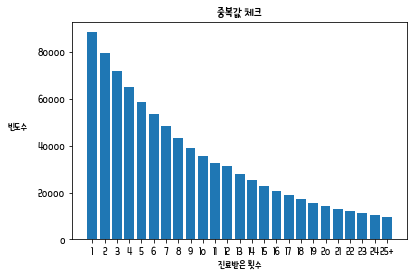

In [55]:
plt.title('중복값 체크')
plt.bar(freq_dup['진료받은 횟수'], freq_dup['빈도수'])
# plt.xticks(x, xlabel)
plt.xlabel('진료받은 횟수')
plt.ylabel('빈도수', rotation = 0, labelpad = 20)
plt.show()

In [73]:
dup_check_train2 = dup_check[dup_check['진료받은 횟수'] > 0]
non_dup = pd.DataFrame(dup_check_train2['진료받은 횟수'].value_counts()).iloc[0, 0]
on_dup = pd.DataFrame(dup_check_train2['진료받은 횟수'].value_counts()).iloc[1:, 0].sum()
print(f'1번만 방문한 환자비율 : {round((non_dup / len(dup_check_train)) * 100, 2)}% / 2번이상 방문한 환자비율 : {round((on_dup / len(dup_check_train)) * 100, 2)}%')
on_dup, non_dup, on_dup + non_dup, len(dup_check_train)

1번만 방문한 환자비율 : 8.85% / 2번이상 방문한 환자비율 : 91.15%


(911542, 88458, 1000000, 1000000)

In [87]:
x1 = pd.DataFrame(df_train['서식코드'].value_counts())['서식코드'][1]
x2 = pd.DataFrame(df_train['서식코드'].value_counts())['서식코드'][0] + pd.DataFrame(df_train['서식코드'].value_counts())['서식코드'][2]
y = pd.DataFrame(df_train['서식코드'].value_counts())['서식코드'].sum()
print(f'입원한 환자비율 : {round((x1 / y) * 100, 2)}% / 입원하지 않은 환자비율 : {round((x2 / y) * 100, 2)}%')
x1, x2, x1 + x2, y

입원한 환자비율 : 2.15% / 입원하지 않은 환자비율 : 97.85%


(283962, 12894383, 13178345, 13178345)

In [96]:
dup_check_train3 = dup_check[dup_check['진료받은 횟수'] > 1]
dup_list = [dup_check_train3['가입자 일련번호'][i] for i in range(len(dup_check_train3['가입자 일련번호']))]

In [97]:
len(dup_list)

911542

In [89]:
df_train.head(2)

,가입자 일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수
0,1,여성,55~59,전라남도,20191104,의과외래,정형외과,근골격계통 질환,근골격계통 질환,1,1,0.25,19240,9600,9640,0
1,1,여성,55~59,전라남도,20190806,의과외래,내과,"내분비, 영양 및 대사질환",비뇨생식계통 질환,1,1,0.25,145680,72800,72880,0


In [38]:
# df_train[df_train['가입자 일련번호'] == dup_list[9]][df_train['서식코드'] == '의과입원']
# 동일한 가입자 일련번호에 요양개시일자가 중복되는 값들은 제거
df_train1 = df_train[df_train['서식코드'] == '의과입원']
df_train1.reset_index(inplace = True)
df_train1.drop(['index'], axis = 1, inplace = True)
df_train1.head(2)     

1000000


C:\Users\Bestc\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,가입자 일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수
0,1,여성,55~59,전라남도,20190807,의과입원,내과,"내분비, 영양 및 대사질환",비뇨생식계통 질환,7,21,0.25,861590,205810,655780,0
1,1,여성,55~59,전라남도,20191022,의과입원,정형외과,근골격계통 질환,근골격계통 질환,12,15,0.25,2899570,638600,2260970,0


In [46]:
# df_train은 모든 서식코드내용이 포함된 내용 / df_train1은 입원한 환자들만 보는 내용
from tqdm.notebook import tqdm
df_test = pd.DataFrame(columns = df_train.columns)
num_list = list(set(df_train1['가입자 일련번호']))
print(len(num_list))
# test_list = []
# for i in tqdm(num_list):
#     df_test1 = df_train1[df_train1['가입자 일련번호'] == i]
#     if pd.DataFrame(df_test1['요양개시일자'].value_counts()).iloc[0, 0] > 1:
#         print(i)
#         test_list.append(i)
# len(test_list)   

for i in tqdm(num_list):
    df_test1 = df_train1[df_train1['가입자 일련번호'] == i]
    df_test2 = df_test1.drop_duplicates(subset = '요양개시일자')
    df_test = pd.concat([df_test, df_test2], axis = 0)

# df_test[df_test['가입자 일련번호'] == 1]['요양개시일자'].value_counts() # 일련번호가 같고 요양개시일자가 같은 열 제거 확인완료
# df_train[df_train['가입자 일련번호'] == 1]['요양개시일자'].value_counts()

134744


  0%|          | 0/134744 [00:00<?, ?it/s]

In [59]:
# df_test = df_test.sort_values(by = '가입자 일련번호')
# df_test.reset_index(inplace = True)
# df_test.drop(['index'], axis = 1, inplace = True)
# df_test.to_csv('C:\\Workspace\\python\\빅데이터 지능형서비스 개발 팀프로젝트(21.9.27~10.6)\\Project-1\\조정범\\Data\\헬스케어데이터(입원환자만 중복제거).csv', index = False)
# df_ch = pd.read_csv('C:\\Workspace\\python\\빅데이터 지능형서비스 개발 팀프로젝트(21.9.27~10.6)\\Project-1\\조정범\\Data\\헬스케어데이터(입원환자만 중복제거).csv')

In [60]:
df_ch

,가입자 일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수
0,1,여성,55~59,전라남도,20190807,의과입원,내과,"내분비, 영양 및 대사질환",비뇨생식계통 질환,7,21,0.25,861590,205810,655780,0
1,1,여성,55~59,전라남도,20191022,의과입원,정형외과,근골격계통 질환,근골격계통 질환,12,15,0.25,2899570,638600,2260970,0
2,15,여성,70~74,세종특별자치시,20190105,의과입원,신경외과,"손상, 중독 및 외인에 의한 질환","손상, 중독 및 외인에 의한 질환",14,21,0.30,10119250,627160,9492090,0
3,25,남성,20~24,광주광역시,20190415,의과입원,내과,호흡계통의 질환,미분류 질환,4,7,0.20,851650,132230,719420,0
4,25,남성,20~24,광주광역시,20191114,의과입원,가정의학과,근골격계통 질환,"손상, 중독 및 외인에 의한 질환",0,0,0.20,56350,11270,45080,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271091,999992,남성,75~79,강원도,20190611,의과입원,내과,근골격계통 질환,혈액 및 조혈기관의 질환,4,12,0.25,705040,153460,551580,0
271092,999997,남성,25~29,서울특별시,20191216,의과입원,정형외과,"손상, 중독 및 외인에 의한 질환","손상, 중독 및 외인에 의한 질환",5,12,0.20,1239310,290510,948800,0
271093,999998,남성,15~19,경상북도,20190602,의과입원,응급의학과,미분류 질환,미분류 질환,1,6,0.30,858300,265600,592700,0
271094,1000000,여성,00~04,경상북도,20190423,의과입원,소아청소년과,출생전후기관련 질환,출생전후기관련 질환,50,50,0.25,39051190,95320,38955870,0
